# Handle Missing Data

1. Delete The record
2. create a seperate model to handle missing value
3. Statistical methods

# Delete the record
only do this step when we have a huge amount of dataset
don't apply on a small dataset

# 2. Create a separate model{much more time}
in this we create a separate model for the missing data in which our model parameter are the known value and the output of the model is our missing value

but it will take much more time

# 3. Statistical Methods

1. Mean->Average
2. Median->Middle element in sorted data
3. Mode->highest frequency element

# Practical

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Missing data

<Axes: >

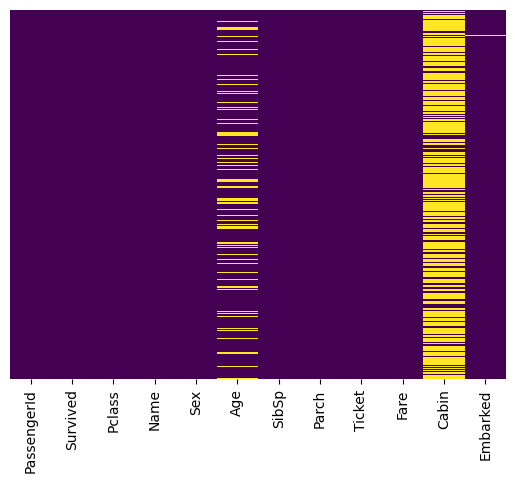

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [6]:
# roughly 20% of age data is missing

In [7]:
sns.set_style("whitegrid")

<Axes: xlabel='Survived', ylabel='count'>

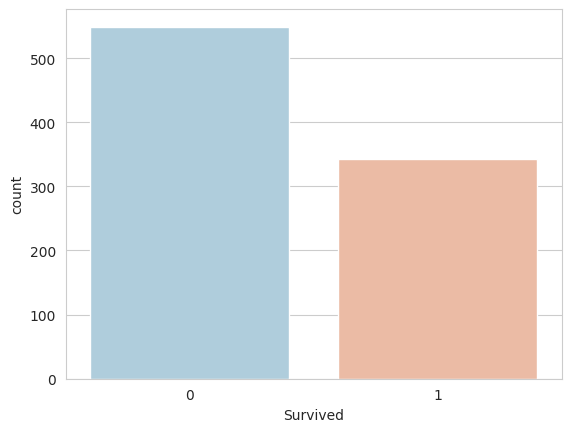

In [10]:
sns.countplot(x='Survived',data=train,palette='RdBu_r')
#0-not survived
#1- survived

<Axes: xlabel='Survived', ylabel='count'>

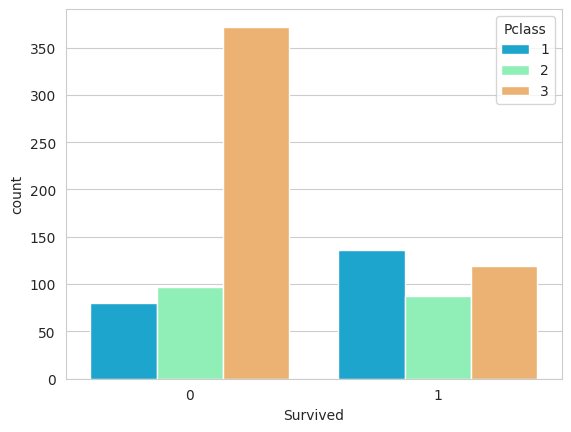

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

/tmp/ipykernel_37426/1781747146.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='Age'>

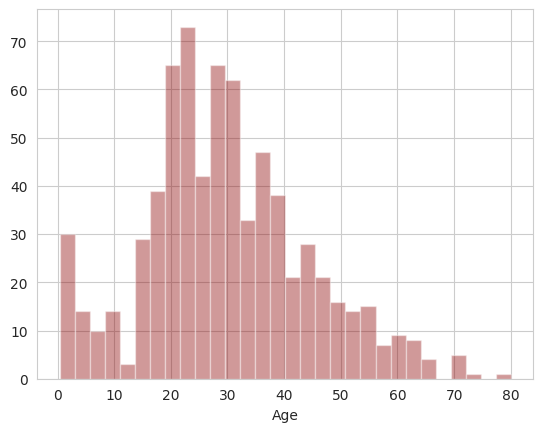

In [18]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: >

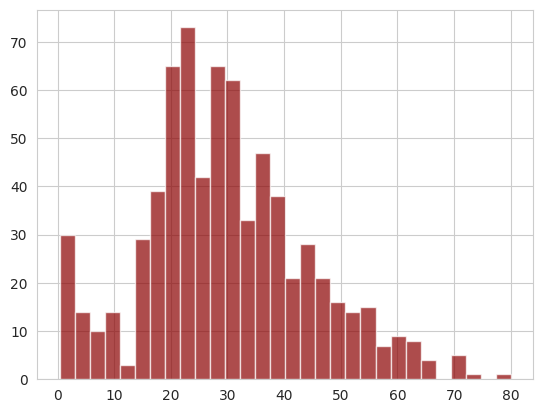

In [19]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

In [20]:
plt.figure(figsize=(12,7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Axes: xlabel='Pclass', ylabel='Age'>

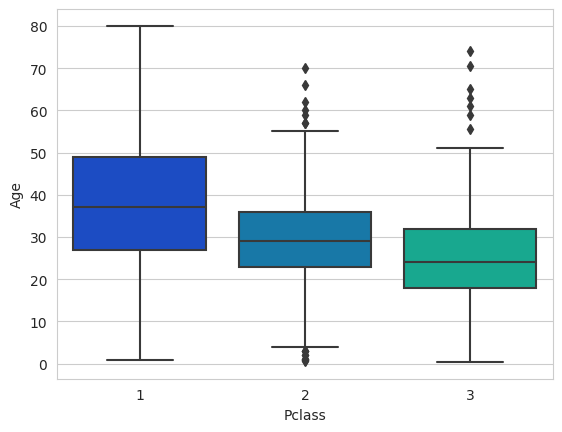

In [23]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [24]:
# we can see the wealthier passengers in the higher class tend to be older 
#which make sense . We'll use these average age values to impute
#base on Pclass for age

In [25]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [28]:
# Apply function

In [29]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

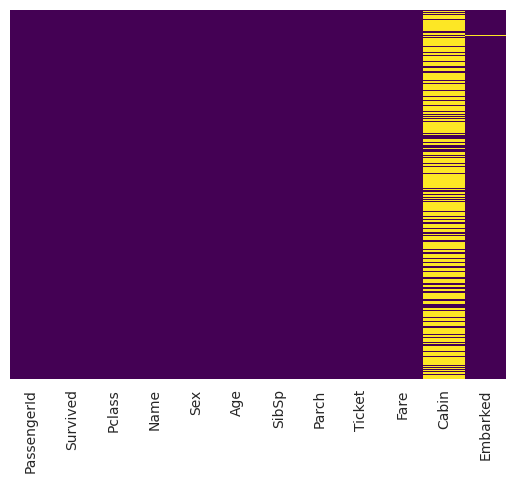

In [30]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')